<a href="https://colab.research.google.com/github/Kimsumin1234/data_analysis/blob/main/2_%EC%B6%9C%EC%83%9D%EC%95%84_%EC%88%98_%EB%B0%8F_%ED%95%A9%EA%B3%84_%EC%B6%9C%EC%82%B0%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 출생아 수 및 합계 출산율

#### 합계 출산율 : 한 여자가 가임기간 (15~49세)에 낳을 것으로 기대되는 평균 출생아 수

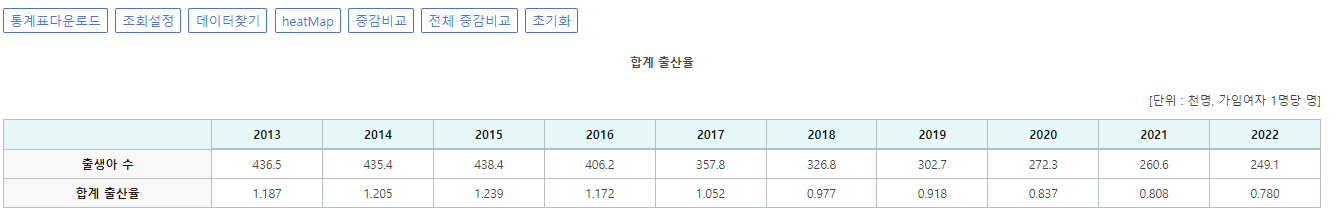

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1. 데이터 로드
- stat.xlsx

In [ ]:
# 엑셀데이터 파일을 그대로 읽어오면 필요하지 않는 데이터도 다 가져와서 모양이 이상하다
df1 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/stat.xlsx')
df1

,통계표명:,합계 출산율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,단위:,"천명, 가임여자 1명당 명",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2013,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000,2021.000,2022.00
2,출생아 수,436.5,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
3,합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78
4,출처:,"통계청, 『2022년 출생통계(확정), 국가승인통계 제10103호 출생통계』",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,주석:,"* 합계 출산율 (TFR, Total Fertility Rate) : 여성 1명이 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터 전처리
# skiprows=

df1 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/stat.xlsx', skiprows=2)
df1

,Unnamed: 0,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,출생아 수,436.5,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
1,합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78
2,출처:,"통계청, 『2022년 출생통계(확정), 국가승인통계 제10103호 출생통계』",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,주석:,"* 합계 출산율 (TFR, Total Fertility Rate) : 여성 1명이 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터 전처리
# nrows=

df1 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/stat.xlsx', skiprows=2, nrows=2)
df1

,Unnamed: 0,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,출생아 수,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
1,합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78


In [ ]:
# 데이터 전처리
# index_col=

df1 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/stat.xlsx', skiprows=2, nrows=2, index_col=0)
df1

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
출생아 수,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78


In [ ]:
# 인덱스 추출
df1.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [ ]:
# \xa0 : 공백
df1.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [ ]:
# 인덱스 명 수정
# '출생아\xa0수' => '출생아 수'
# 컬럼명수정 방법 : 1) df1.columns = ['수정할 컬럼명 포함 전체 컬럼명 나열'] , 2) df1.rename(columns={'원본':'변경'})

df1 = df1.rename(index={'출생아\xa0수':'출생아 수','합계\xa0출산율':'합계 출산율'})
df1

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
출생아 수,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78


In [ ]:
df1.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [ ]:
# 출생아 수
# 인덱스에 접근하는 방법 : loc(인덱스 이름), iloc(인덱스 위치)

df1.loc['출생아 수']

2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
2022    249.1
Name: 출생아 수, dtype: float64

In [ ]:
# 행열 바꿈 : transpose() or T

# df1.transpose()

df1 = df1.T
df1

,출생아 수,합계 출산율
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837
2021,260.6,0.808
2022,249.1,0.780


Text(0.5, 1.0, '합계 출산율')

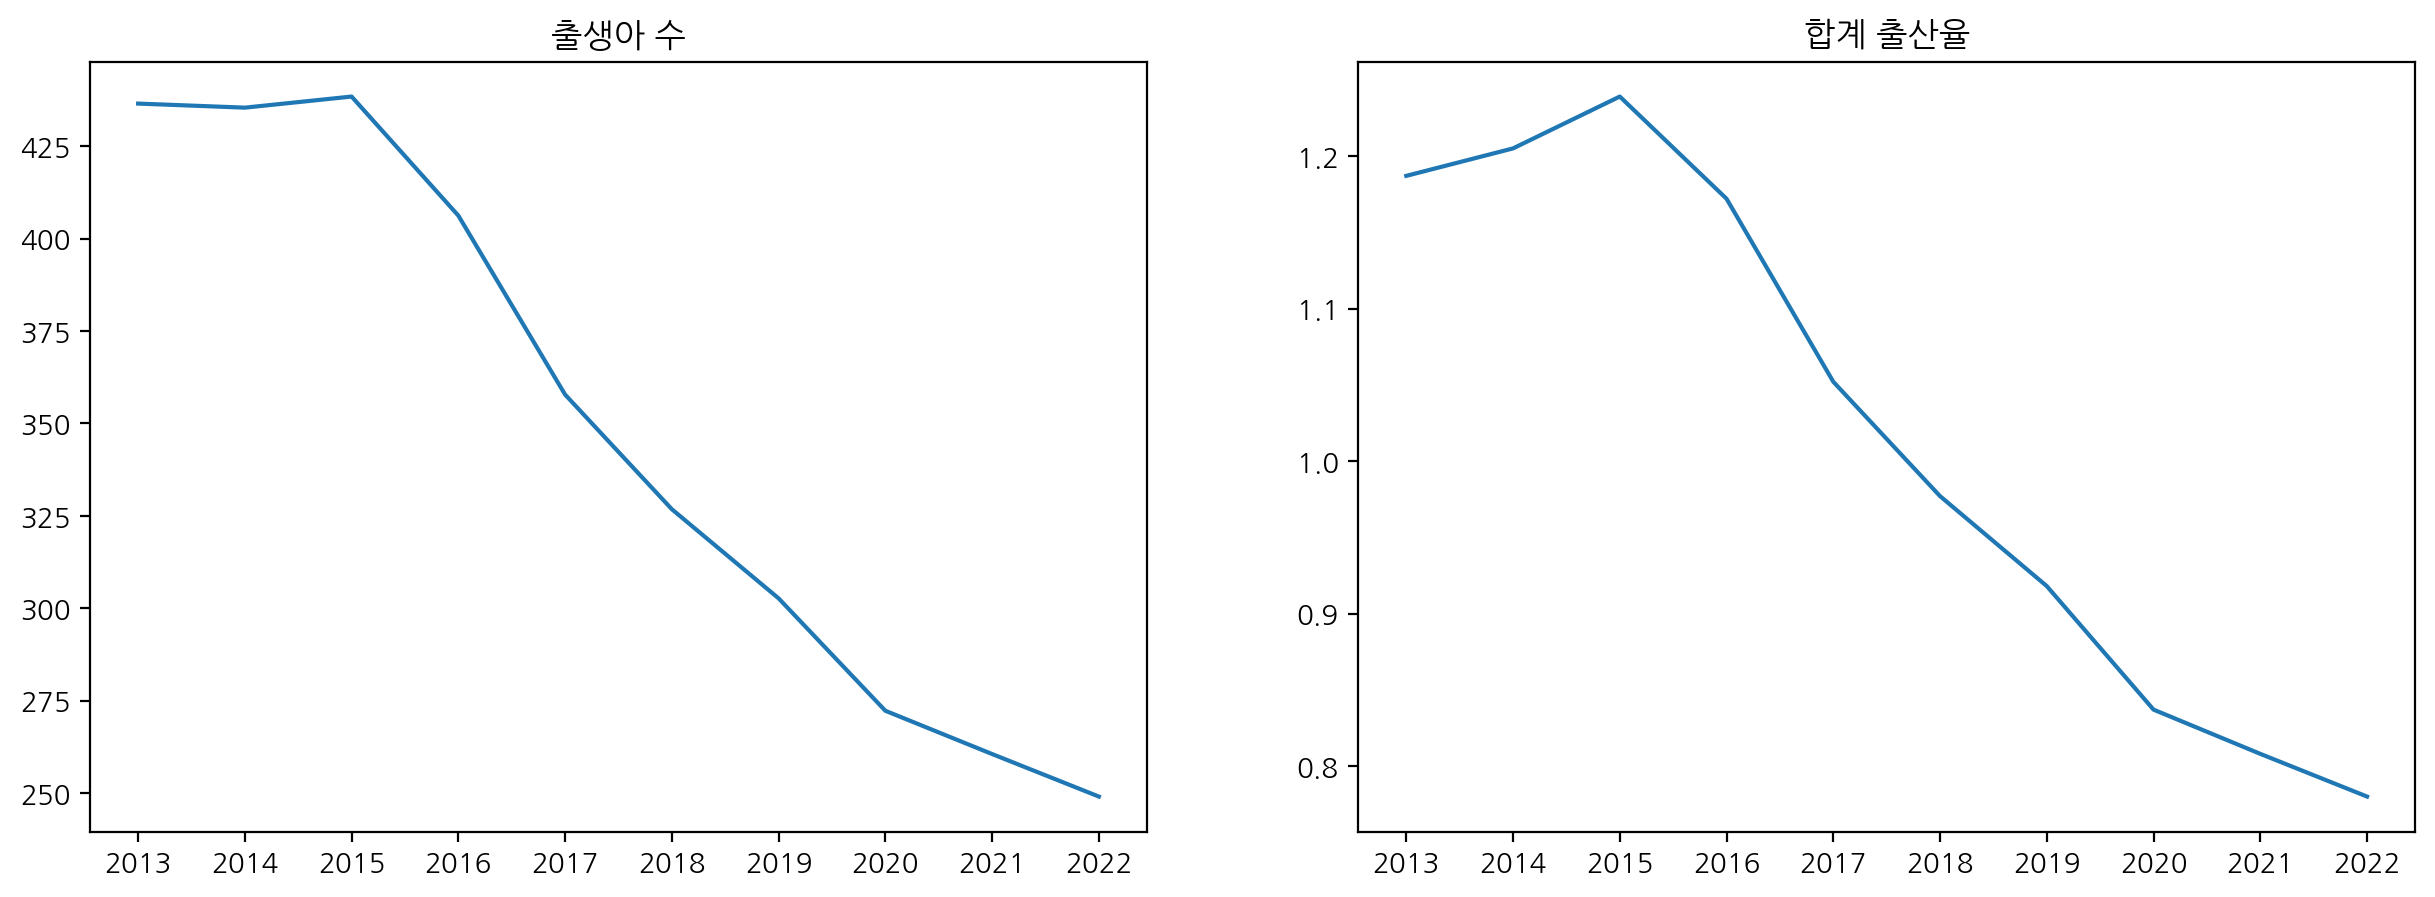

In [ ]:
# 선차트 작성
# matplotlib 사용

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(df1['출생아 수'])
ax[0].set_title('출생아 수')
ax[1].plot(df1['합계 출산율'])
ax[1].set_title('합계 출산율')

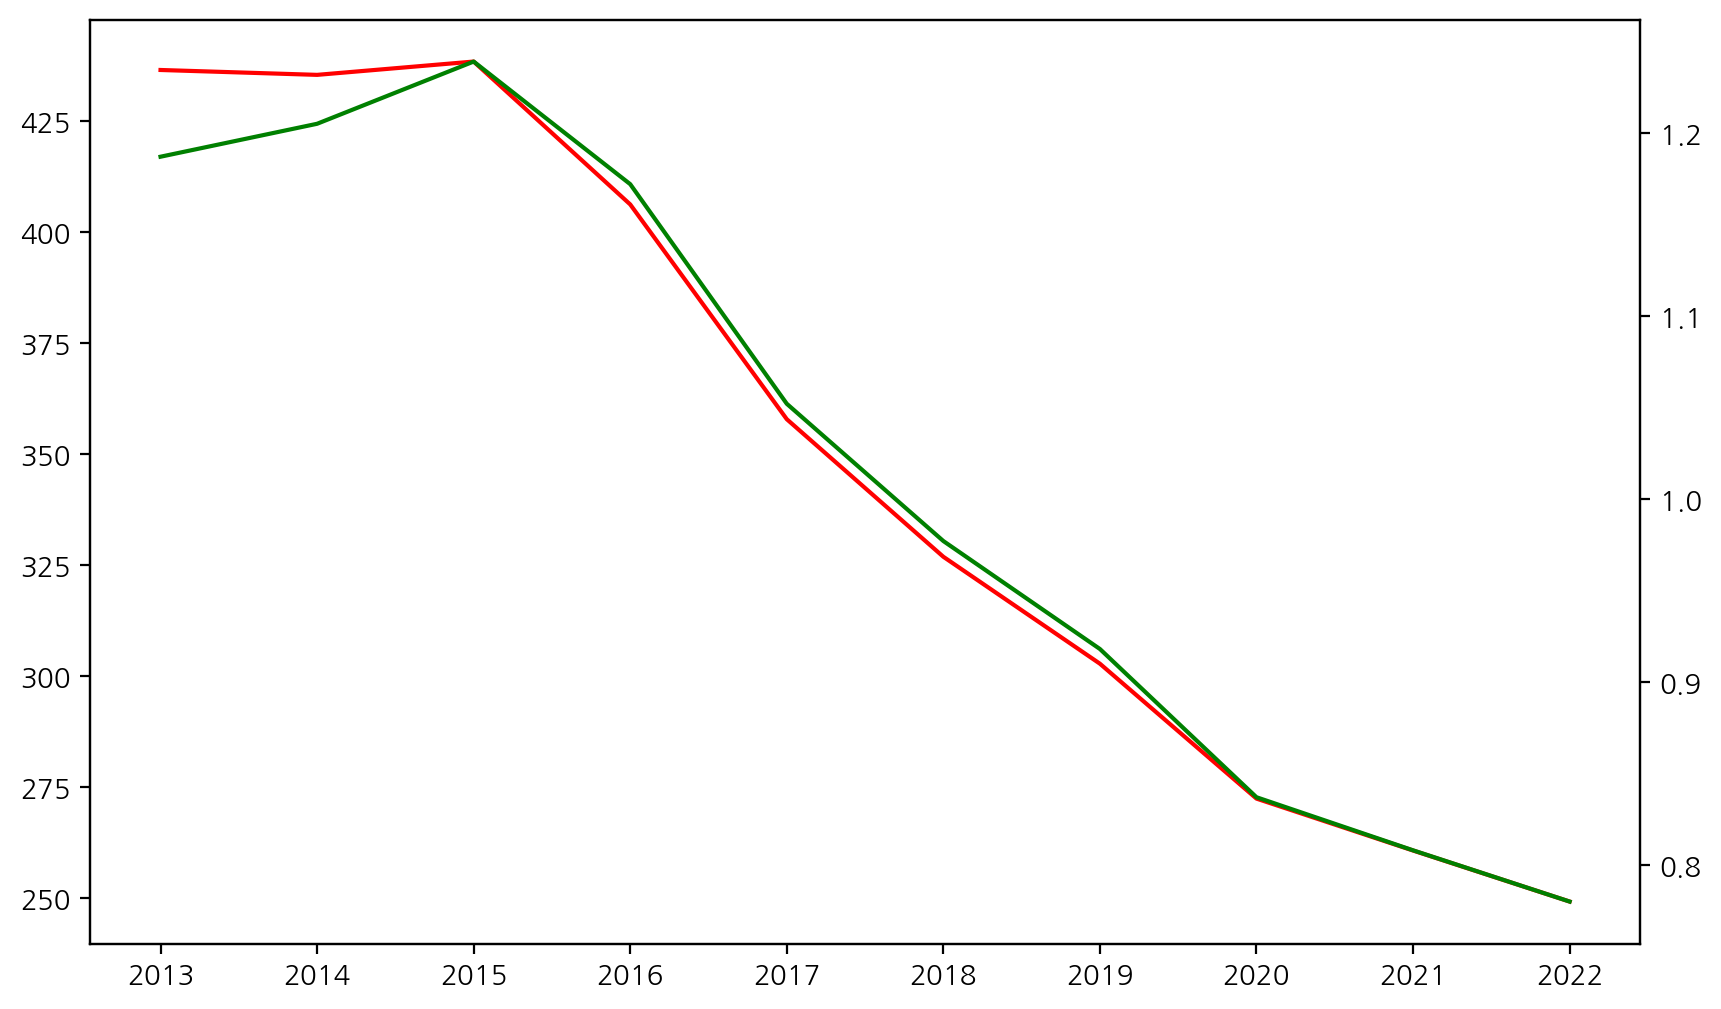

In [ ]:
# 축설정 (z축 활용)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df1.index,df1['출생아 수'], color='r')

# z축 설정
ax2 = ax.twinx()
ax2.plot(df1.index,df1['합계 출산율'], color='g')

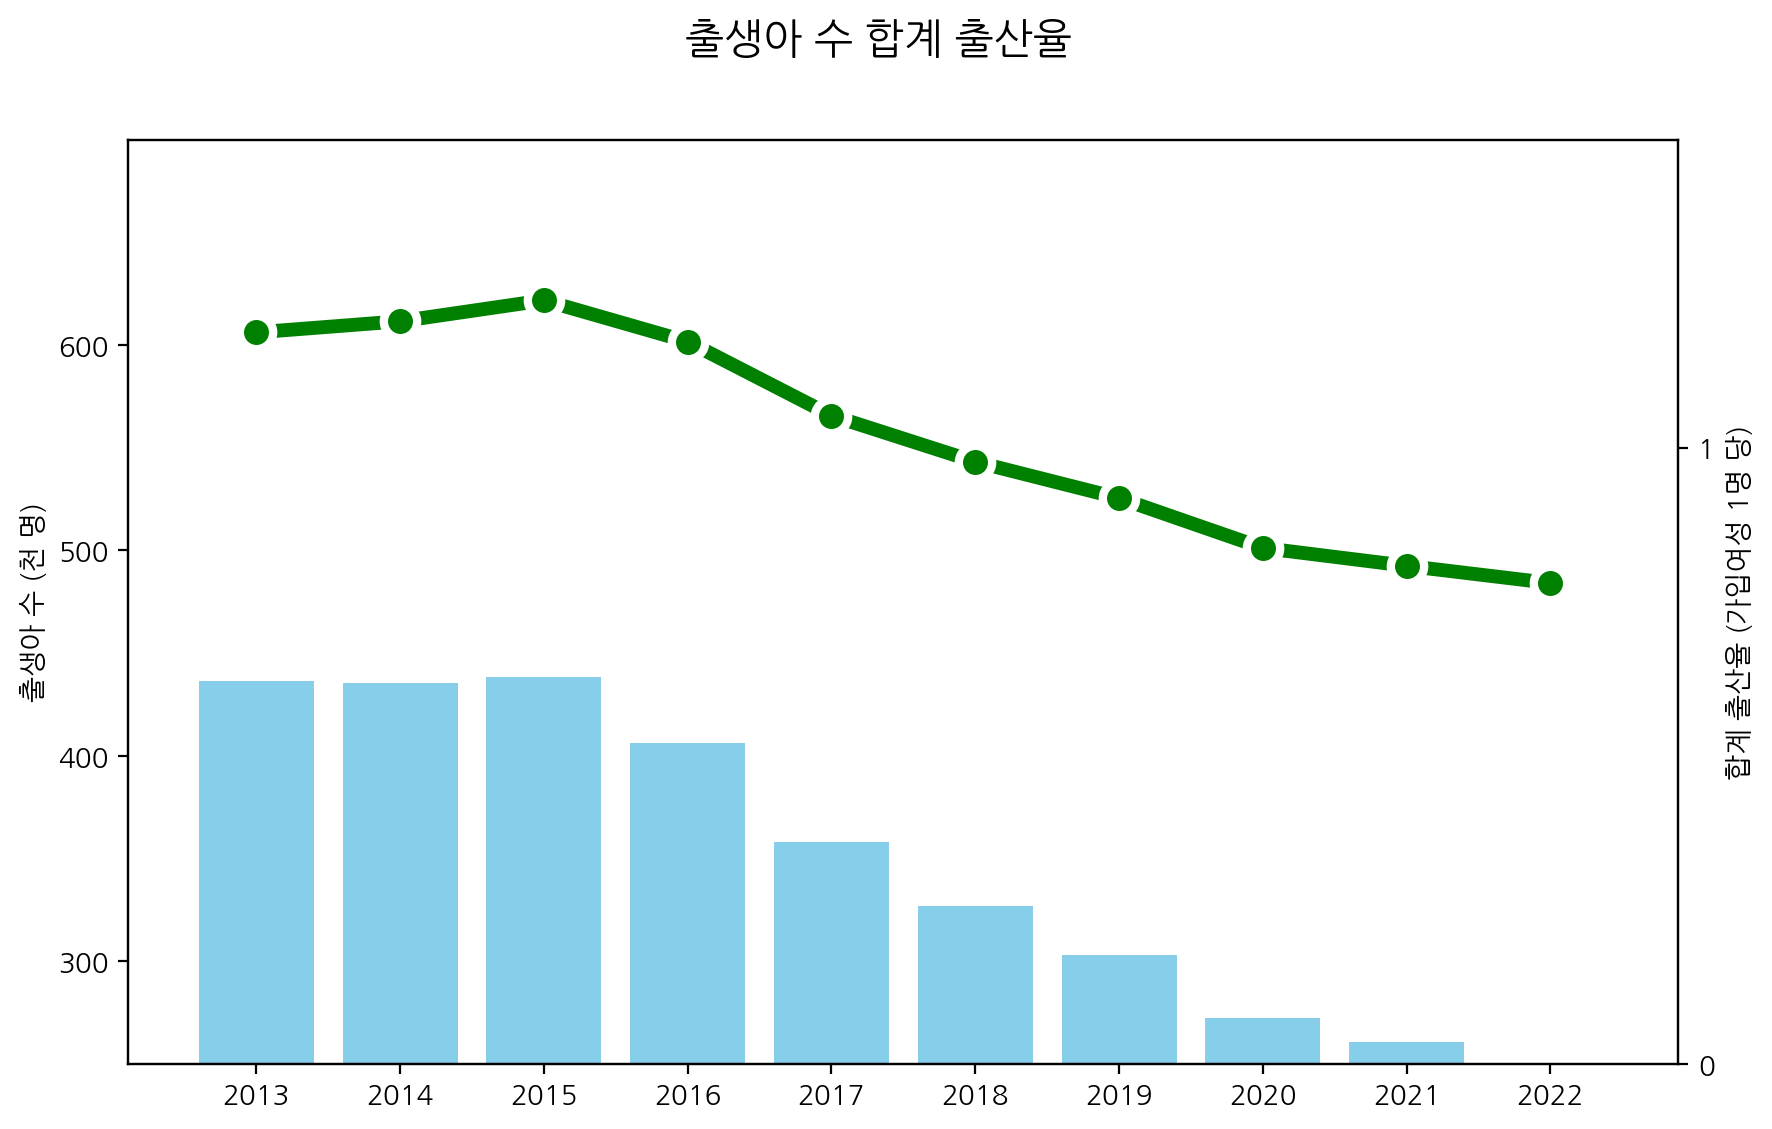

In [ ]:
# 눈금 설정 : y축 범위-600~300, y축-100단위 , z축 범위-0~1.5

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('출생아 수 합계 출산율',fontsize=15)

ax.set_ylabel('출생아 수 (천 명)')
ax.set_ylim(250,700)
ax.set_yticks([300,400,500,600])
ax.bar(df1.index,df1['출생아 수'], color='skyblue')

# z축 설정
ax2 = ax.twinx()
ax2.set_ylabel('합계 출산율 (가입여성 1명 당)')
ax2.set_ylim(0,1.5)
ax2.set_yticks([0,1])
ax2.plot(df1.index,df1['합계 출산율'], color='g', marker='o', ms=12, lw=5, mec='w', mew=3)

In [ ]:
df1['출생아 수'][0]

436.5

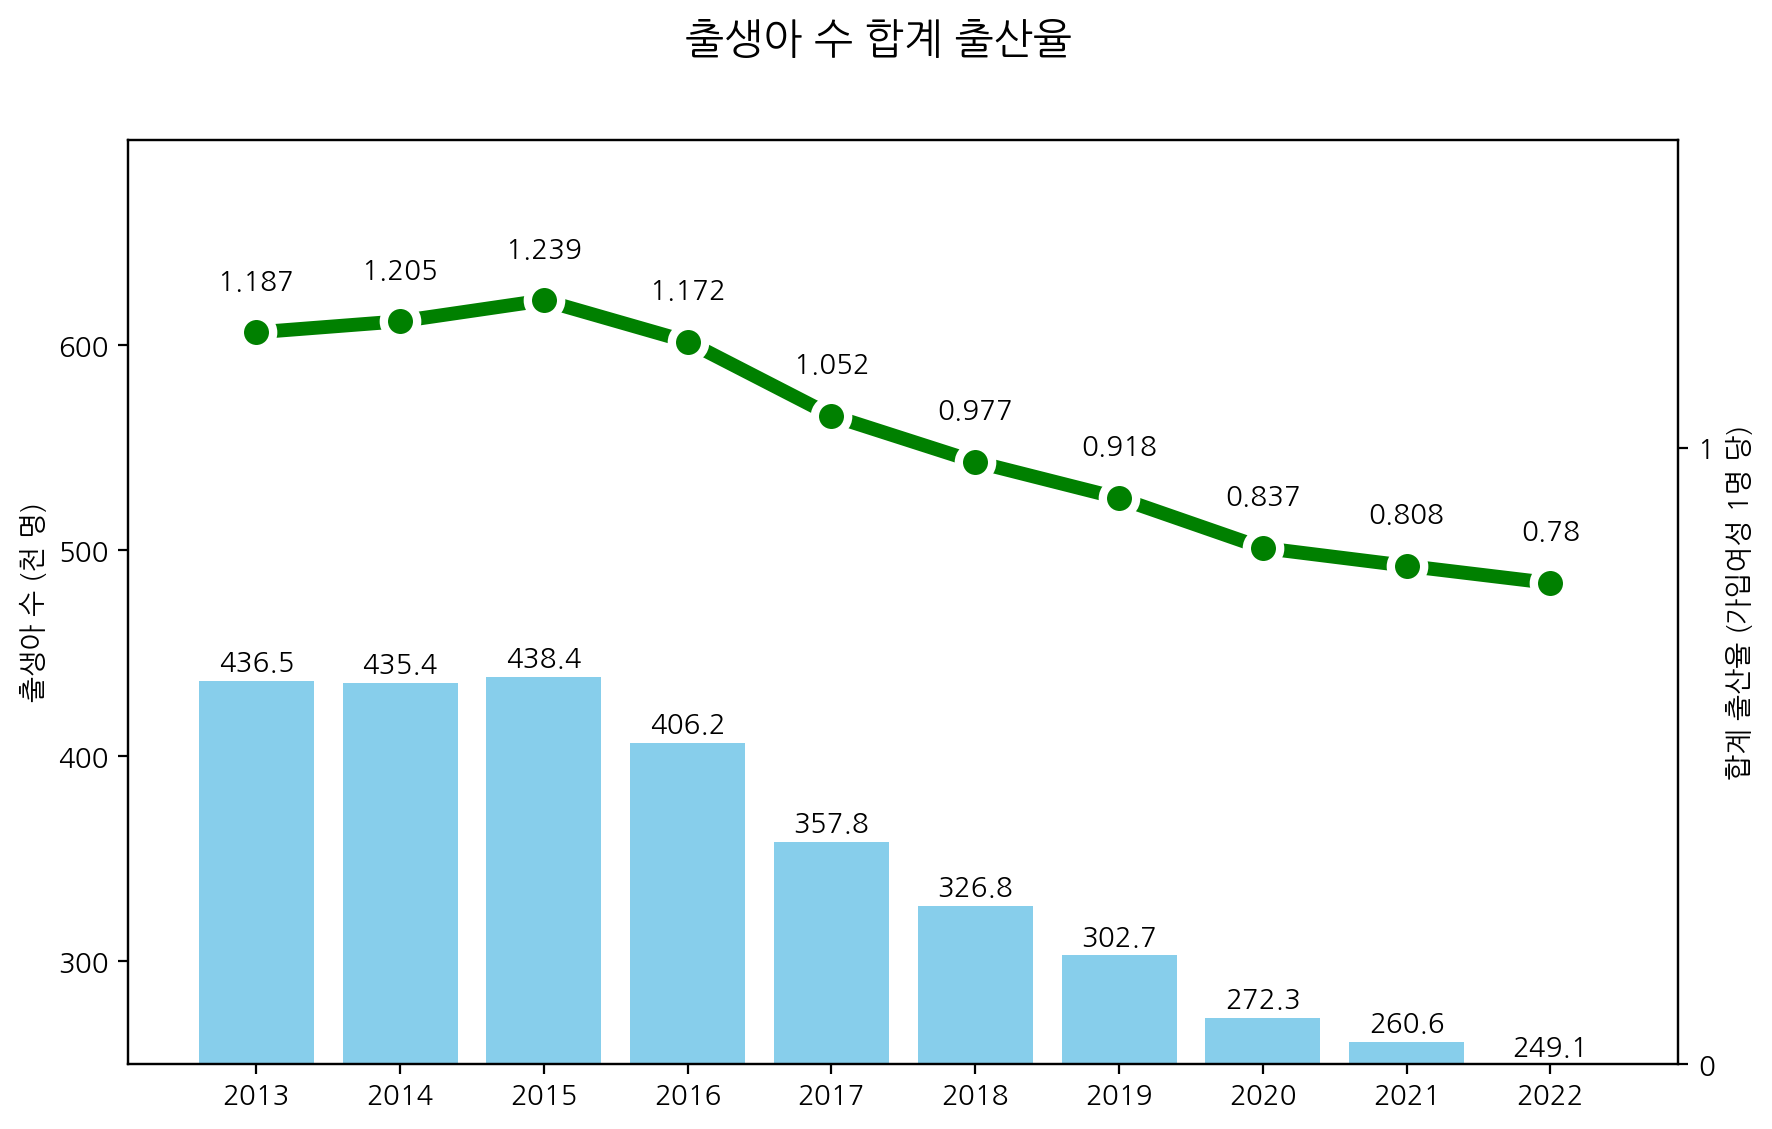

In [ ]:
# 차트에 value 값 도 보여주기

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('출생아 수 합계 출산율',fontsize=15)

ax.set_ylabel('출생아 수 (천 명)')
ax.set_ylim(250,700)
ax.set_yticks([300,400,500,600])
bar1 = ax.bar(df1.index,df1['출생아 수'], color='skyblue')

for idx, val in enumerate(df1['출생아 수']):
  plt.text(idx, val+5, val, ha='center')

ax2 = ax.twinx()
ax2.set_ylabel('합계 출산율 (가입여성 1명 당)')
ax2.set_ylim(0,1.5)
ax2.set_yticks([0,1])
plot1 = ax2.plot(df1.index,df1['합계 출산율'], color='g', marker='o', ms=12, lw=5, mec='w', mew=3)

for idx, val in enumerate(df1['합계 출산율']):
  plt.text(idx, val+0.07, val, ha='center')

<Axes: xlabel='None', ylabel='출생아 수'>

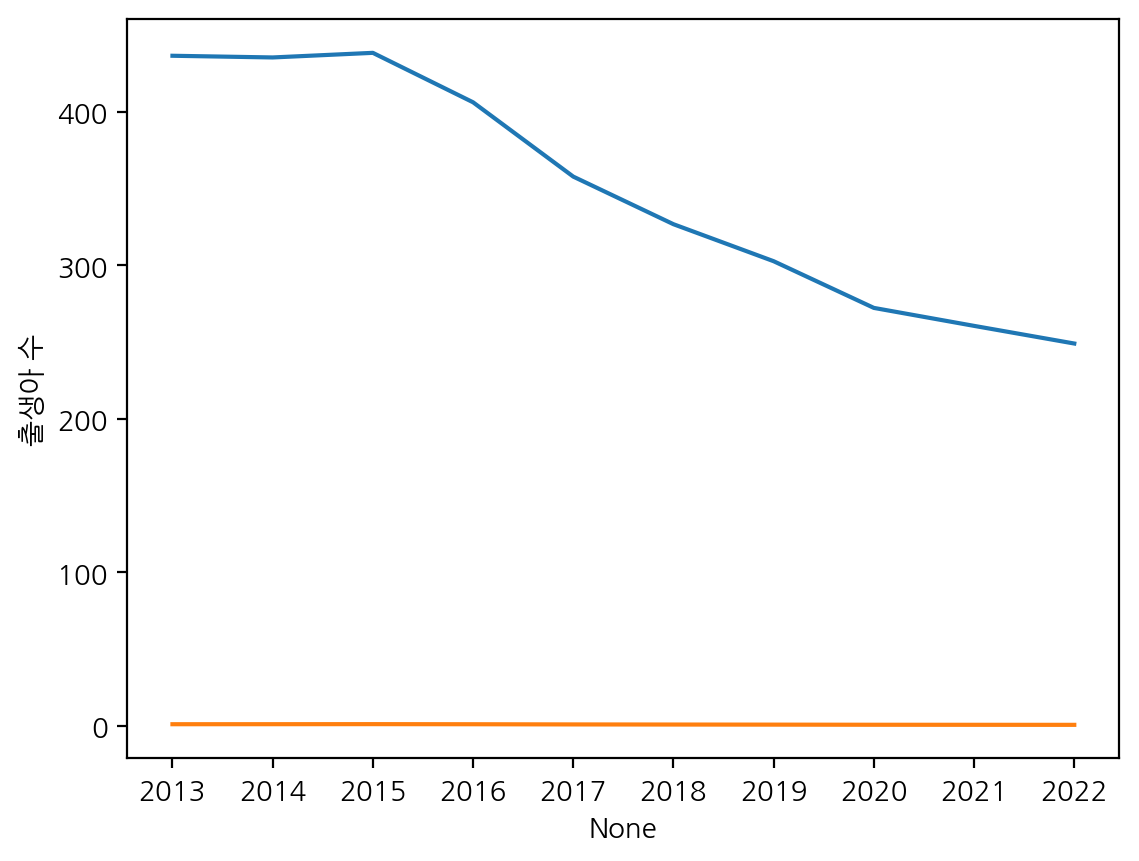

In [ ]:
# seaborn

sns.lineplot(data=df1, x=df1.index, y='출생아 수')
sns.lineplot(data=df1, x=df1.index, y='합계 출산율')